# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Margareth Serepine Simanjuntak
- **Email:** margareths4167@gmail.com
- **ID Dicoding:** margareths16

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan jumlah penyewaan sepeda pada hari libur dan hari kerja?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 3 : Apakah terdapat perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?
- Pertanyaan 4 : Apakah ada perubahan jumlah penyewaan sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Tabel Hour**

In [316]:
hourofbike_df = pd.read_csv('dataset/hour.csv')
hourofbike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Tabel Day**

In [317]:
dayofbike_df = pd.read_csv('dataset/day.csv')
dayofbike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data pada Tabel Hour secara rinci membahas mengenai penyewaan sepeda dengan melihat pola jam tertentu, digunakan dalam analisis harian, seperti jam sibuk dan jam sepi.
- Data pada Tabel Day membahas mengenai analisis tren pola dalam jangka panjang, seperti mingguan atau bulanan, juga pengaruh musim atau cuaca terhadap penyewaan sepeda.

### Assessing Data

**Hourly Bike Data**

1. menilai data dan memeriksa tipe data dari tiap kolom pada hourofbike_df

In [318]:
hourofbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. memeriksa duplikasi data pada hourofbike_df

In [319]:
print("Jumlah duplikasi: ", hourofbike_df.duplicated().sum())

Jumlah duplikasi:  0


3. memeriksa parameter statistik dari kolom numerik yang terdapat dalam hourofbike_df

In [320]:
hourofbike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Daily Bike Data**

1. menilai data dan memeriksa tipe data dari tiap kolom pada dayofbike_df

In [321]:
dayofbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. memeriksa duplikasi data pada dayofbike_df

In [322]:
print("Jumlah duplikasi: ", dayofbike_df.duplicated().sum())

Jumlah duplikasi:  0


3. memeriksa parameter statistik dari kolom numerik yang terdapat dalam dayofbike_df

In [323]:
dayofbike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tipe data untuk kolom _dteday_ seharusnya diubah menjadi tipe data _datetime_ bukan _object_
- tidak ditemukan _missing value_ dari kedua data (hourofbike_df dan dayofbike_df)
- tidak terdapat duplikat data dari kedua data (hourofbike_df dan dayofbike_df)

### Cleaning Data

Pada tahap ini, dilakukan pengubahan tipe data pada kolom _dteday_ agar mudah dalam melakukan analisis berbasis waktu.

In [324]:
hourofbike_df['dteday'] = pd.to_datetime(hourofbike_df['dteday'])
hourofbike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [325]:
dayofbike_df['dteday'] = pd.to_datetime(dayofbike_df['dteday'])
dayofbike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- mengubah tipe data pada kolom _dteday_ dari tipe data _object_ menjadi _datetime_

## Exploratory Data Analysis (EDA)

### Explore Data hourofbike_df

In [326]:
hourofbike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Mencari rata-rata penyewaan sepeda pada hari libur dan hari kerja pada data hourofbike_df menggunakan tabel**

In [327]:
workingday_hour = hourofbike_df.groupby("workingday")["cnt"].mean()

workingday_tags = {0: "Hari Libur", 1: "Hari Kerja"}
workingday_hour.index = workingday_hour.index.map(workingday_tags)
workingday_hour = workingday_hour.to_frame().reset_index()
workingday_hour.columns = ["Kategori", "Rata-rata"]

print("\nRata-rata penyewaan Sepeda:")
display(workingday_hour)


Rata-rata penyewaan Sepeda:


,Kategori,Rata-rata
0,Hari Libur,181.405332
1,Hari Kerja,193.207754


berdasarkan tabel disimpulkan bahwa, lebih banyak orang yang menyewa sepeda pada hari kerja dibanding hari libur.

**Menghitung jumlah penyewaan sepeda pada kondisi cuaca tertentu**

In [328]:
weather_trend_hour = hourofbike_df.groupby("weathersit")["cnt"].sum()

weather_tags = {
    1: "Cerah berawan",
    2: "Mendung kabut",
    3: "Hujan ringan",
    4: "Badai ekstrem"
}

weather_trend_hour.index = weather_trend_hour.index.map(weather_tags)
weather_trend_hour = weather_trend_hour.to_frame().reset_index()
weather_trend_hour.columns = ["Cuaca", "Jumlah"]

print("\nJumlah Penyewaan Sepeda:")
display(weather_trend_hour)


Jumlah Penyewaan Sepeda:


,Cuaca,Jumlah
0,Cerah berawan,2338173
1,Mendung kabut,795952
2,Hujan ringan,158331
3,Badai ekstrem,223


Berdasarkan tabel, jumlah terbanyak orang menyewa sepeda saat cuaca "Cerah berawan".

**Menghitung perbedaan banyaknya anggota yang kasual dan terdaftar**

In [329]:
month_tags = {
        1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
        7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

hourofbike_df["month"] = hourofbike_df["mnth"].map(month_tags)
hourofbike_df["month"] = pd.Categorical(hourofbike_df["month"], categories=month_tags.values(), ordered=True)
monthly_user_trend_hour = hourofbike_df.groupby("month", observed=False)[["casual", "registered"]].sum().reset_index()

print("\nBanyaknya penyewaan berdasarkan jenis pengguna:")
display(monthly_user_trend_hour)


Banyaknya penyewaan berdasarkan jenis pengguna:


,month,casual,registered
0,Jan,12042,122891
1,Feb,14963,136389
2,Mar,44444,184476
3,Apr,60802,208292
4,May,75285,256401
5,Jun,73906,272436
6,Jul,78157,266791
7,Aug,72039,279155
8,Sep,70323,275668
9,Oct,59760,262592


### Explore Data dayofbike_df

In [330]:
dayofbike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Mencari rata-rata penyewaan sepeda pada hari libur dan hari kerja pada data dayofbike_df menggunakan tabel**

In [331]:
workingday_day = dayofbike_df.groupby("workingday")["cnt"].mean()

workingday_tags = {0: "Hari Libur", 1: "Hari Kerja"}
workingday_day.index = workingday_day.index.map(workingday_tags)
workingday_day = workingday_day.to_frame().reset_index()
workingday_day.columns = ["Kategori", "Rata-rata"]

print("\nRata-rata penyewaan Sepeda:")
display(workingday_day)


Rata-rata penyewaan Sepeda:


,Kategori,Rata-rata
0,Hari Libur,4330.168831
1,Hari Kerja,4584.820000


berdasarkan tabel disimpulkan bahwa, lebih banyak orang yang menyewa sepeda pada hari kerja dibanding hari libur.

**Menghitung jumlah penyewaan sepeda pada kondisi cuaca tertentu**

In [332]:
weather_trend_day = dayofbike_df.groupby("weathersit")["cnt"].sum()

weather_tags = {
    1: "Cerah berawan",
    2: "Mendung kabut",
    3: "Hujan ringan",
    4: "Badai ekstrem"
}

weather_trend_day.index = weather_trend_day.index.map(weather_tags)
weather_trend_day = weather_trend_day.to_frame().reset_index()
weather_trend_day.columns = ["Cuaca", "Jumlah"]

print("\nJumlah Penyewaan Sepeda:")
display(weather_trend_day)


Jumlah Penyewaan Sepeda:


,Cuaca,Jumlah
0,Cerah berawan,2257952
1,Mendung kabut,996858
2,Hujan ringan,37869


Berdasarkan tabel, jumlah terbanyak orang menyewa sepeda saat cuaca "Cerah berawan".

In [333]:
month_tags = {
   1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

dayofbike_df["month"] = dayofbike_df["mnth"].map(month_tags)
dayofbike_df["month"] = pd.Categorical(dayofbike_df["month"], categories=month_tags.values(), ordered=True)
monthly_user_trend_day = dayofbike_df.groupby("month", observed=False)[["casual", "registered"]].mean().reset_index()

print("\nRata-rata penyewaan sepeda berdasarkan jenis pengguna:")
display(monthly_user_trend_day)


Rata-rata penyewaan sepeda berdasarkan jenis pengguna:


,month,casual,registered
0,Jan,194.225806,1982.112903
1,Feb,262.508772,2392.789474
2,Mar,716.838710,2975.419355
3,Apr,1013.366667,3471.533333
4,May,1214.274194,4135.500000
5,Jun,1231.766667,4540.600000
6,Jul,1260.596774,4303.080645
7,Aug,1161.919355,4502.500000
8,Sep,1172.050000,4594.466667
9,Oct,963.870968,4235.354839


**Menghitung total penyewaan sepeda perbulan setiap tahun untuk melihat perubahannya**

In [334]:
year_tags = {0: "2011", 1: "2012"}
dayofbike_df["yr"] = dayofbike_df["yr"].map(year_tags)

year_trend = dayofbike_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

year_trend.columns = year_trend.columns.map(month_tags)
year_trend.index = year_trend.index.astype(str)

print("\nTotal Penyewaan Sepeda per Bulan dan Tahun:")
display(year_trend)


Total Penyewaan Sepeda per Bulan dan Tahun:


mnth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


**Insight:**
- Rata-rata pengguna menyewa sepeda lebih banyak pada hari kerja
- Cuaca cerah berawan memiliki nilai terbesar dalam penyewaan sepeda
- Perbedaan nilai yang lebih tinggi dimiliki oleh pengguna yang terdaftar setiap bulannya
- Terdapat perubahan nilai yang tinggi pada tahun 2012 dibanding tahun 2011

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan penyewaan sepeda pada hari kerja dan hari libur?

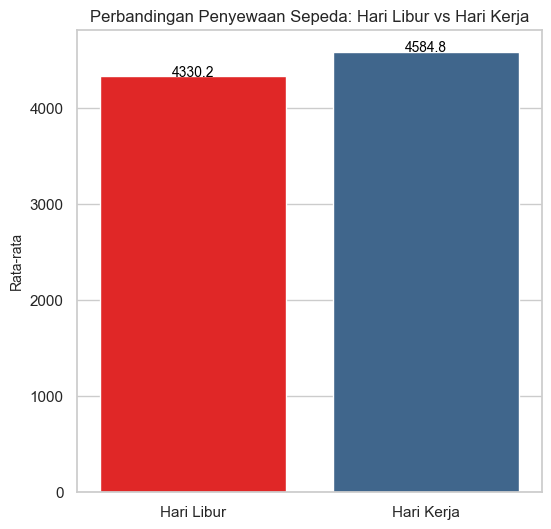

In [335]:
sns.set_theme(style="whitegrid")
colors = ["#FF0808", "#336699"]  

plt.figure(figsize=(6, 6))
sns.barplot(
    x="Kategori", 
    y="Rata-rata", 
    hue="Kategori",  
    data=workingday_day, 
    palette=colors,
    legend=False  
)

plt.title("Perbandingan Penyewaan Sepeda: Hari Libur vs Hari Kerja", fontsize=12)
plt.xlabel("")
plt.ylabel("Rata-rata", fontsize=10)

for index, value in enumerate(workingday_day["Rata-rata"]):
    plt.text(index, value + 2, f"{value:.1f}", ha='center', fontsize=10, color="black")

plt.show()

**Insight:**
- Berdasarkan visualisasi data yang pertama. Diagram menunjukkan warna merah sebagai hari libur, dan warna biru sebagai hari kerja. Dengan hasil yang didapat, rata-rata penyewaan sepeda di hari kerja lebih tinggi nilainya dibanding hari libur. Hal itu dapat dipengaruhi oleh pengguna yang lebih banyak beraktivitas di luar saat hari hari sibuk di hari kerja

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

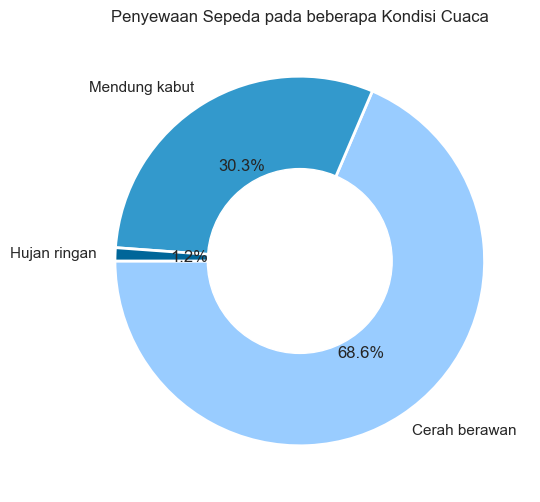

In [336]:
weather_colors = {
    "Cerah berawan": "#99CCFF",   
    "Mendung kabut": "#3399CC",   
    "Hujan ringan": "#006699",    
    "Badai ekstrem": "#333366"    
    }

colors = [weather_colors[label] for label in weather_trend_day["Cuaca"]]

plt.figure(figsize=(6, 6))
plt.pie(
    weather_trend_day["Jumlah"], 
    labels=weather_trend_day["Cuaca"], 
    autopct="%1.1f%%", 
    startangle=180, 
    colors=colors, 
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

center_circle = plt.Circle((0, 0), 0.50, fc="white")
plt.gca().add_artist(center_circle)
plt.title("Penyewaan Sepeda pada beberapa Kondisi Cuaca", fontsize=12)
plt.show()

**Insight**
- Berdasarkan visualisasi data kedua. Diagram donat menggambarkan perbandingan nyata berdasarkan warna atas pengaruh cuaca terhadap penyewaan sepeda. Jadi dapat disimpulkan, kondisi cuaca sangat berpengaruh dalam penyewaan sepeda. Jumlah terbesar penyewaan sepeda terjadi saat cuaca cerah maupun berawan, dan jumlah terkecil terjadi saat cuaca hujan. Hal ini dapat disebabkan oleh kondisi cuaca yang lebih nyaman dan mendukung aktivitas, lebih menarik banyak pengguna untuk menyewa sepeda.

### Pertanyaan 3 : Apakah terdapat perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?


<Figure size 1000x600 with 0 Axes>

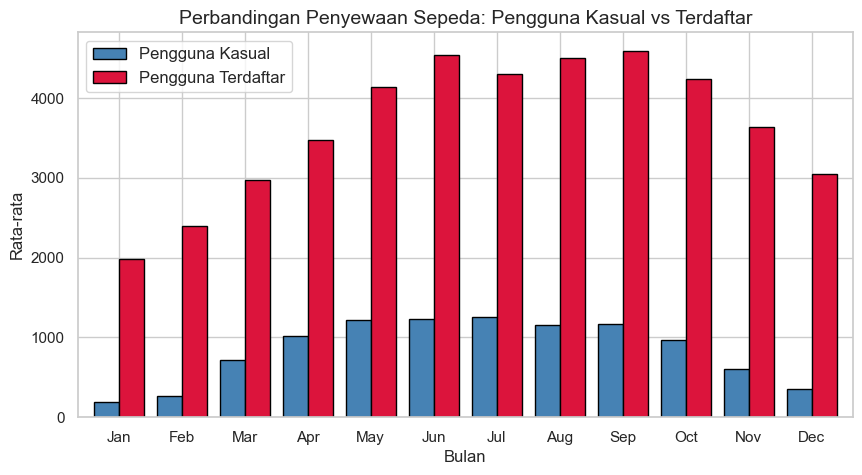

In [337]:
sns.set_theme(style="whitegrid")
colors = ["#4682B4", "#DC143C"]  

plt.figure(figsize=(10, 6))
monthly_user_trend_day.set_index("month").plot(
    kind="bar",
    color=colors,
    width=0.8,
    edgecolor="black",
    figsize=(10, 5)
)

plt.title("Perbandingan Penyewaan Sepeda: Pengguna Kasual vs Terdaftar", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(["Pengguna Kasual", "Pengguna Terdaftar"], fontsize=12)
plt.show()

**Insight:**
- Pada visualisasi data ketiga, digunakan bar chart untuk menunjukkan bagaimana perbedaan yang signifikan antara jumlah dua tipe pengguna yang ada. Dapat disimpulkan pada setiap bulan, jumlah pengguna yang terdaftar lebih dominan dalam menyewa sepeda daripada pengguna kasual (yang tidak terdaftar). 

### Pertanyaan 4 : Apakah ada perubahan jumlah penyewaan sepeda dari tahun 2011 ke 2012?

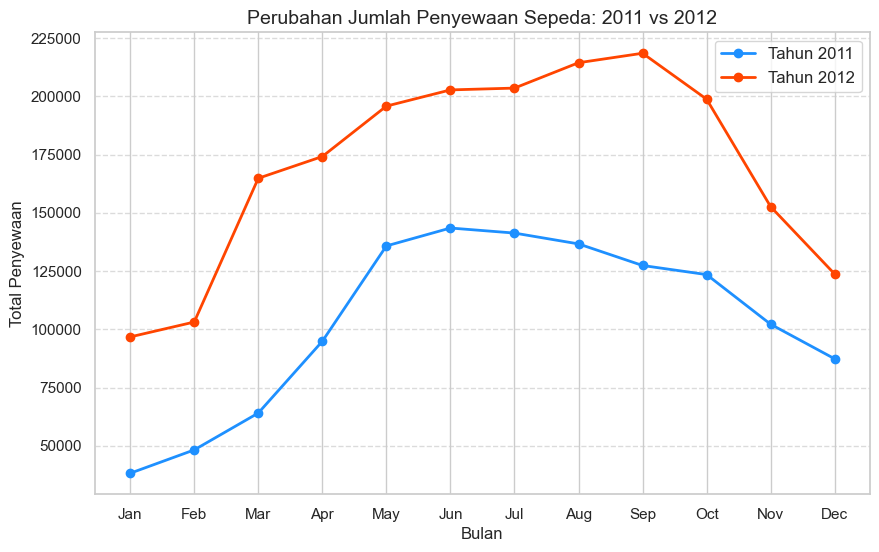

In [338]:
sns.set_theme(style="whitegrid")
colors = ["#1E90FF", "#FF4500"]  

plt.figure(figsize=(10, 6))

for i, year in enumerate(year_trend.index):
    plt.plot(
        year_trend.columns, 
        year_trend.loc[year], 
        marker="o", 
        linestyle="-", 
        linewidth=2, 
        markersize=6, 
        color=colors[i], 
        label=f"Tahun {year}"
    )

plt.title("Perubahan Jumlah Penyewaan Sepeda: 2011 vs 2012", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(rotation=0) 
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Berdasarkan visualisasi data terakhir, diagram menunjukkan terdapatnya perubahan yang signifikan dari penyewaan sepeda di tahun 2011 dan 2012. Jumlah penyewaan sepeda yang meningkat di tahun 2012 dengan pola musiman yang serupa dengan tahun 2011, digambarkan pada dua garis berwarna jingga dan biru. Tetapi di tahun 2012, pengguna yang menyewa sepeda berjumlah lebih tinggi di setiap bulannya dibanding tahun 2011.

## Conclusion

- Conclusion pertanyaan 1 :
Perbandingan Penyewaan Sepeda pada Hari Kerja dan Hari Libur. Berdasarkan visualisasi yang ditampilkan dalam bar chart, rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi untuk aktivitas sehari-hari seperti bekerja atau sekolah, bukan hanya untuk rekreasi. Saat hari libur, pengguna yang menyewa cenderung lebih sedikit karena pengguna memiliki alternatif kegiatan lain dan tidak bepergian sejauh di hari kerja.
- Conclusion pertanyaan 2 : Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda. Berdasarkan hasil diagram donat, terlihat bahwa cuaca memiliki dampak besar terhadap jumlah penyewaan sepeda. Penyewaan sepeda tertinggi terjadi saat cuaca cerah atau berawan, sementara jumlahnya jauh lebih rendah saat kondisi hujan. Hal ini bisa disebabkan oleh kenyamanan pengguna dalam bersepeda saat kondisi cuaca mendukung, sedangkan cuaca buruk menghambat aktivitas luar ruangan.
- Conclusion pertanyaan 3 : Perbedaan Jumlah Penyewaan Sepeda antara Pengguna Kasual dan Pengguna Terdaftar. Visualisasi  pada bar chart, menggambarkan tren pengguna sepeda berdasarkan tipenya. Terlihat bahwa pengguna terdaftar lebih mendominasi penyewaan sepeda dibandingkan pengguna kasual. Artinya, pengguna yang telah berlangganan layanan penyewaan cenderung lebih sering menggunakan sepeda dibandingkan pengguna kasual yang hanya menyewa sesekali. Hal ini menunjukkan keberhasilan program langganan dalam meningkatkan penggunaan sepeda secara rutin.
- Conclusion pertanyaan 4 : Perubahan Jumlah Penyewaan Sepeda dari Tahun 2011 ke 2012. Berdasarkan line chart, jumlah penyewaan sepeda mengalami peningkatan signifikan pada tahun 2012 dibandingkan tahun 2011. Pola musiman tetap serupa, dengan peningkatan jumlah penyewaan selama musim panas dan penurunan saat mendekati akhir tahun. Namun, di setiap bulan, jumlah penyewaan di tahun 2012 selalu lebih tinggi dibandingkan 2011. Hal ini bisa disebabkan oleh meningkatnya popularitas layanan sepeda, perbaikan infrastruktur, atau kampanye promosi yang lebih efektif.

In [339]:
dayofbike_df.to_csv("main_dataset.csv", index=False)